In [1]:
#ASSIGNMENT 5
# Predicting Student Exam Performance

# 1.	Load and preprocess the dataset (convert categorical variables to numerical using OneHotEncoding or LabelEncoding).

# Step 1:  We import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# We load and Inspect Dataset

# Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
# The first few rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# The data overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [5]:
# Preprocess Dataset (Encoding Categorical Features)
# Check unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']
math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score: [ 74  88  93  44  75 

In [6]:
# To apply OneHotEncoding to all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [7]:
# To view the encoded dataframe
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


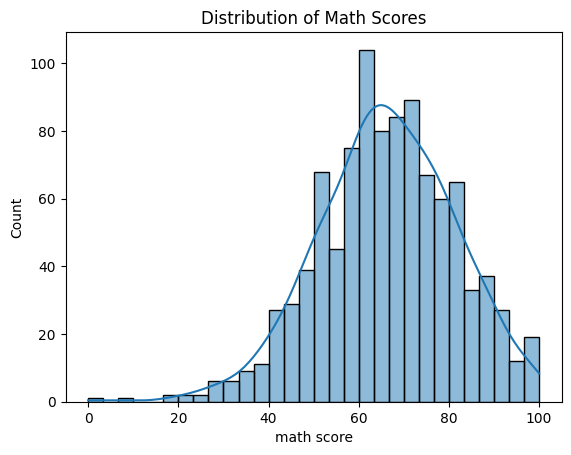

In [8]:
# 2.  Visualize Distributions and Correlations

# The distribution of math scores
sns.histplot(df['math score'], kde=True, bins=30)
plt.title("Distribution of Math Scores")
plt.show()

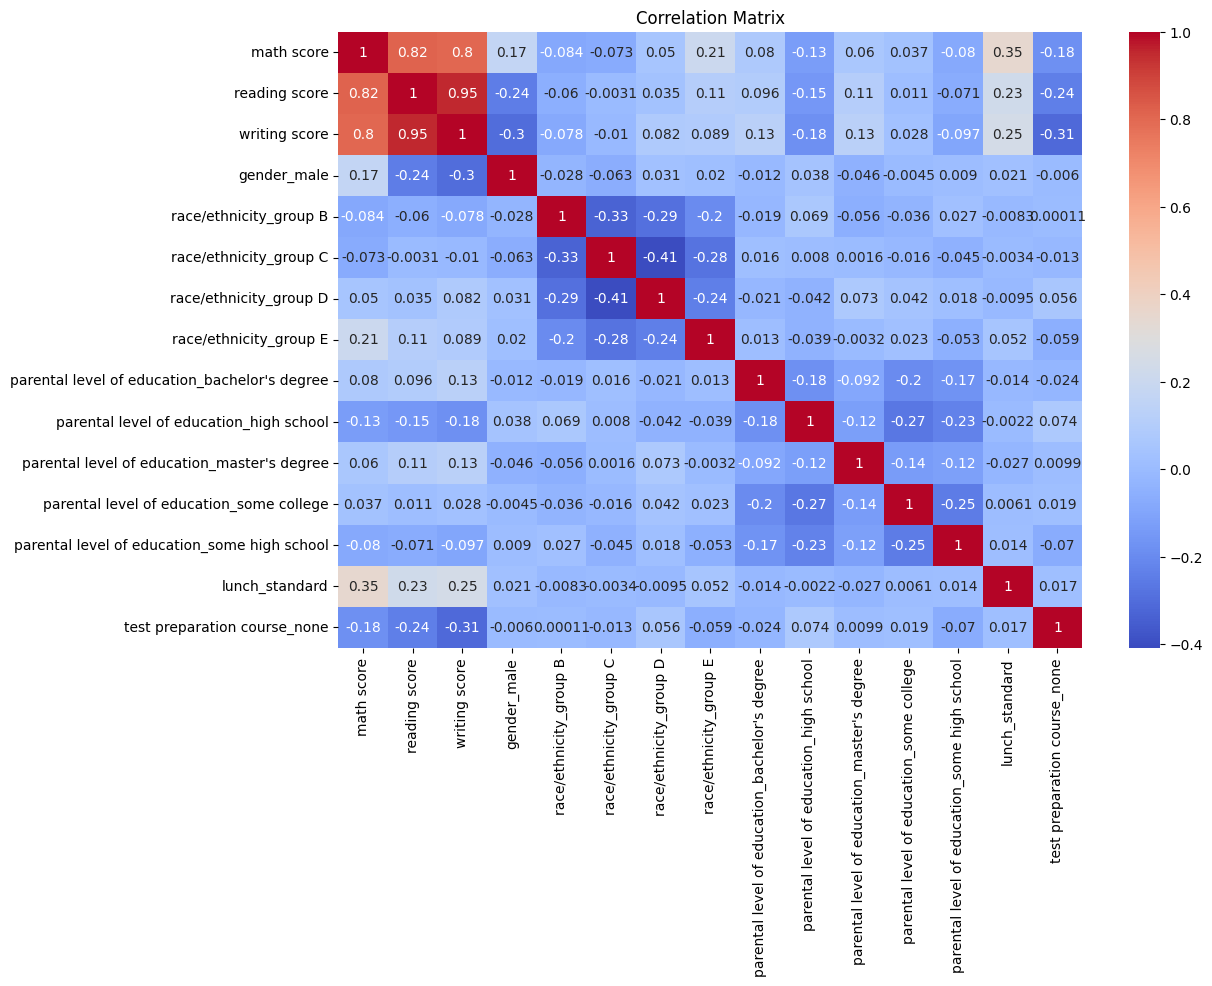

In [9]:
# The correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [11]:
# 3.	Build a Multiple Linear Regression model to predict math score.
# We define features (exclude math score) and target

X = df_encoded.drop(['math score'], axis=1)
y = df_encoded['math score']

In [12]:
# We Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# We train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict
y_pred = lr.predict(X_test)

In [15]:
# To evaluate model
print("Multiple Linear Regression - Math Score Prediction")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Multiple Linear Regression - Math Score Prediction
R² Score: 0.8804332983749565
MAE: 4.214763142474851
RMSE: 5.393993869732843


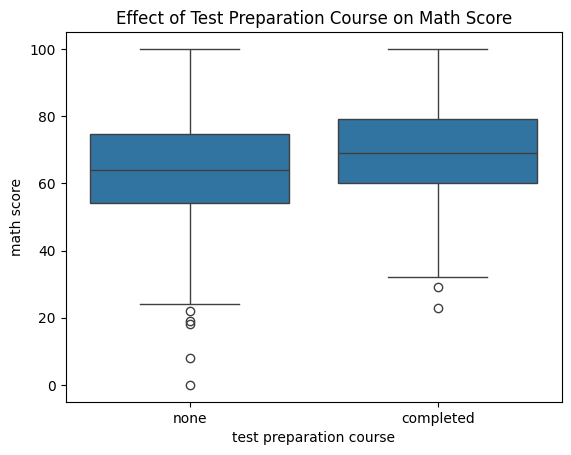

In [16]:
# 4.	Analyze the effect of test preparation course and parental education level on scores.

# The effect of test preparation course
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Effect of Test Preparation Course on Math Score")
plt.show()

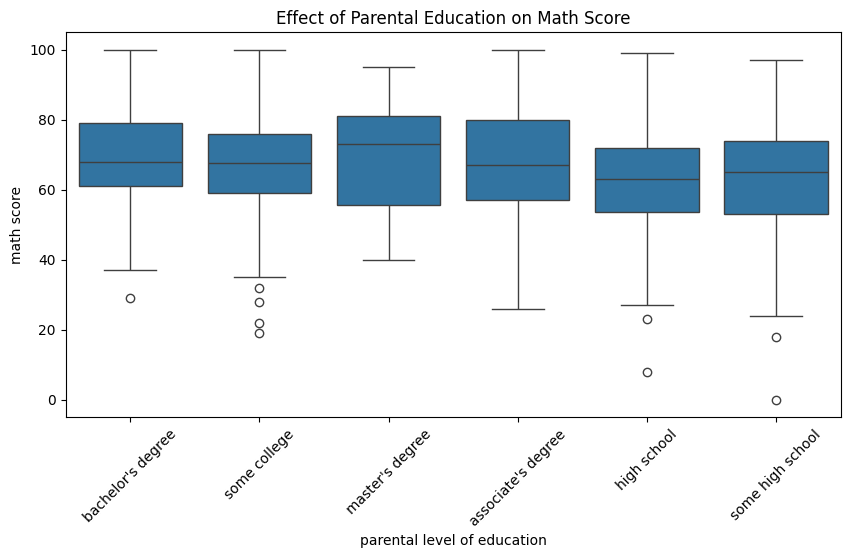

In [17]:
# The effect of parental level of education

plt.figure(figsize=(10,5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title("Effect of Parental Education on Math Score")
plt.xticks(rotation=45)
plt.show()

In [18]:
# 6.	Bonus: Try building separate models for each gender and compare performance.

# Separate data by gender
df_male = df[df['gender'] == 'male']
df_female = df[df['gender'] == 'female']

In [20]:
#  To Encode and model for each gender
def train_gender_model(df_gender):
    df_encoded = pd.get_dummies(df_gender, drop_first=True)
    X = df_encoded.drop(['math score'], axis=1)
    y = df_encoded['math score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model for {df_gender['gender'].iloc[0].capitalize()}:")
    print("R²:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

In [22]:
# Train and compare the models
train_gender_model(df_male)
train_gender_model(df_female)

Model for Male:
R²: 0.8523343299308626
MAE: 4.539428504758008
RMSE: 5.4152155626390766

Model for Female:
R²: 0.9000728204155696
MAE: 4.419252682145407
RMSE: 5.479252194803445

